In [12]:
# The goal of this project is to analyze NYPD arrest data

In [13]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import timeit
import io

In [14]:
from google.colab import drive
# Mount google drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [15]:
# Load the data set
df=pd.read_csv('/content/mydrive/MyDrive/NYPD_Arrest_Data_(Year_to_Date)_20251215.csv')

In [16]:
#view data
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
0,298760433,01/02/2025,782,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,Q,115,3,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,299030225,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,28,0,25-44,M,BLACK,997439,233857,40.808558,-73.952357,POINT (-73.952357 40.808558)
2,299127494,01/08/2025,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,81,1,(null),(null),WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299188536,01/09/2025,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,7,2,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
4,299533742,01/16/2025,155,RAPE 2,104.0,RAPE,PL 1303001,F,K,81,0,18-24,F,BLACK,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)


In [17]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [18]:
df.shape

(212486, 19)

In [19]:
df.count()

,0
ARREST_KEY,212486
ARREST_DATE,212486
PD_CD,212486
PD_DESC,212486
KY_CD,212470
OFNS_DESC,212486
LAW_CODE,212486
LAW_CAT_CD,211482
ARREST_BORO,212486
ARREST_PRECINCT,212486


In [20]:
#sort by precinct
df.sort_values(by='ARREST_PRECINCT', ascending=True)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
121496,307942787,06/11/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1701003,F,M,1,0,25-44,M,BLACK,979791,198249,40.710832,-74.016085,POINT (-74.016085 40.710832)
52953,303762790,03/27/2025,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,M,1,1,(null),(null),BLACK,982466,197787,40.709556,-74.006435,POINT (-74.00643483 40.70955616)
137021,307494454,06/03/2025,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,1,0,(null),(null),BLACK,983174,203734,40.725890,-74.003882,POINT (-74.003882 40.72589)
181603,311733898,08/23/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,1,0,45-64,M,WHITE,984468,202765,40.723230,-73.999212,POINT (-73.999212 40.72323)
52904,303381050,03/21/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,1,1,(null),(null),BLACK,982103,198029,40.710220,-74.007744,POINT (-74.00774423 40.71022031)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141415,309903253,07/20/2025,113,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,S,123,0,45-64,M,WHITE,914928,125756,40.511586,-74.249303,POINT (-74.249303 40.511586)
165,299180846,01/09/2025,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,S,123,0,(null),(null),WHITE,919642,131653,40.527808,-74.232404,POINT (-74.232404 40.527808)
178518,310965872,08/10/2025,905,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,S,123,11,45-64,M,WHITE HISPANIC,926731,142481,40.557567,-74.206997,POINT (-74.20699746 40.5575666)
171003,311120953,08/13/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,S,123,0,45-64,M,WHITE,914928,125756,40.511586,-74.249303,POINT (-74.249303 40.511586)


In [21]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.124860e+05,212486.000000,212470.000000,212486.000000,212486.000000,2.124860e+05,212486.000000,212486.000000,212486.000000
mean,3.062481e+08,444.569901,258.236942,63.077426,0.908479,1.003371e+06,207112.864335,40.653639,-73.773658
std,4.357060e+06,273.845791,146.873614,34.890970,6.723647,4.999574e+04,31296.312460,1.834632,3.326835
min,2.987043e+08,12.000000,101.000000,1.000000,0.000000,-7.300000e+01,0.000000,0.000000,-74.252488
25%,3.022993e+08,157.000000,117.000000,40.000000,0.000000,9.903760e+05,184616.000000,40.673341,-73.977751
50%,3.063403e+08,439.000000,341.000000,62.000000,0.000000,1.005142e+06,206302.000000,40.732925,-73.924053
75%,3.099783e+08,724.000000,344.000000,100.000000,0.000000,1.017273e+06,236070.000000,40.814611,-73.880100
max,3.137501e+08,972.000000,995.000000,123.000000,97.000000,1.067220e+06,271597.000000,40.912111,0.000000


In [22]:
#check for mising values
df.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,0
PD_DESC,0
KY_CD,16
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,1004
ARREST_BORO,0
ARREST_PRECINCT,0


In [23]:
#Pick any zip code/neighborhood/district in this dataset as an initial comparison point
#ARREST_PRECINCT = 94th Precint (Greenpoint - current neighborhood)
#Pick a feature/measure/column
#ARREST_KEY = Randomly generated persistent ID for each arrest / can be used as count
#PERP_RACE AND PERP_SEX
#Which Sex and Race dominates the arrests in Greenpoin, Brooklyn

In [24]:
#create smaller data frame based upon above
df2 = df[['ARREST_PRECINCT', 'PERP_RACE', 'PERP_SEX', 'ARREST_KEY' ]]
df2.head()
df2.sort_values(by='ARREST_PRECINCT', ascending=True)

,ARREST_PRECINCT,PERP_RACE,PERP_SEX,ARREST_KEY
121496,1,BLACK,M,307942787
52953,1,BLACK,(null),303762790
137021,1,BLACK,(null),307494454
181603,1,WHITE,M,311733898
52904,1,BLACK,(null),303381050
...,...,...,...,...
141415,123,WHITE,M,309903253
165,123,WHITE,(null),299180846
178518,123,WHITE HISPANIC,M,310965872
171003,123,WHITE,M,311120953


In [25]:
#check for missing values in data frame
df2.isnull().sum()

,0
ARREST_PRECINCT,0
PERP_RACE,0
PERP_SEX,0
ARREST_KEY,0


In [26]:
#choose one precint only = Precint 94
df3=df2.loc[df2['ARREST_PRECINCT'].isin([94])]

In [27]:
df3.shape

(987, 4)

In [28]:
df3.head()

,ARREST_PRECINCT,PERP_RACE,PERP_SEX,ARREST_KEY
109,94,WHITE HISPANIC,(null),299998355
167,94,BLACK,(null),299612675
174,94,WHITE HISPANIC,M,300139511
312,94,BLACK,(null),299615203
447,94,BLACK,M,298770233


<Axes: xlabel='PERP_RACE'>

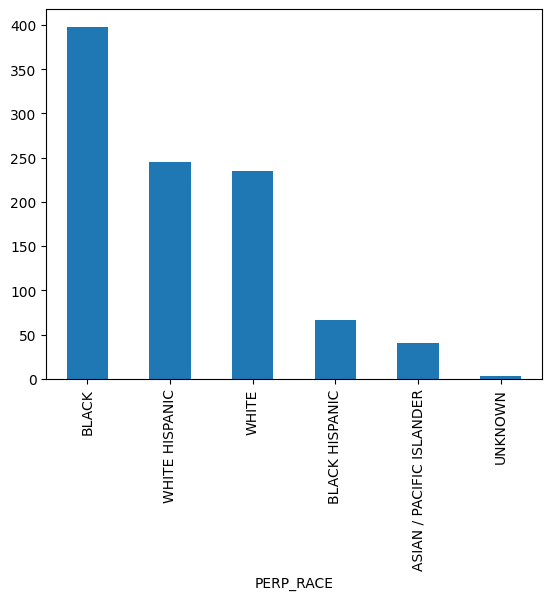

In [29]:
#visualize race arrest numbers using arrest key as count
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='PERP_SEX'>

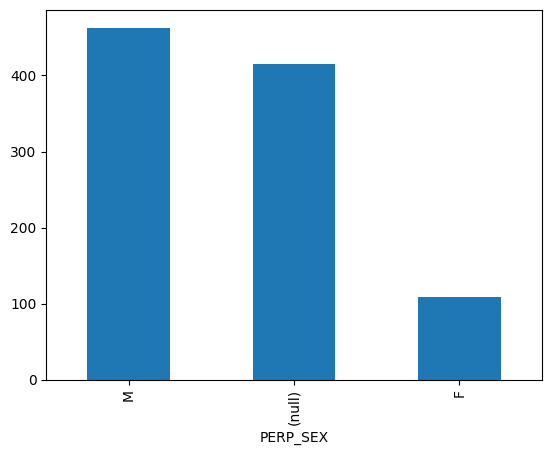

In [30]:
#visualize arrest by sex numbers using arrest key as count
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

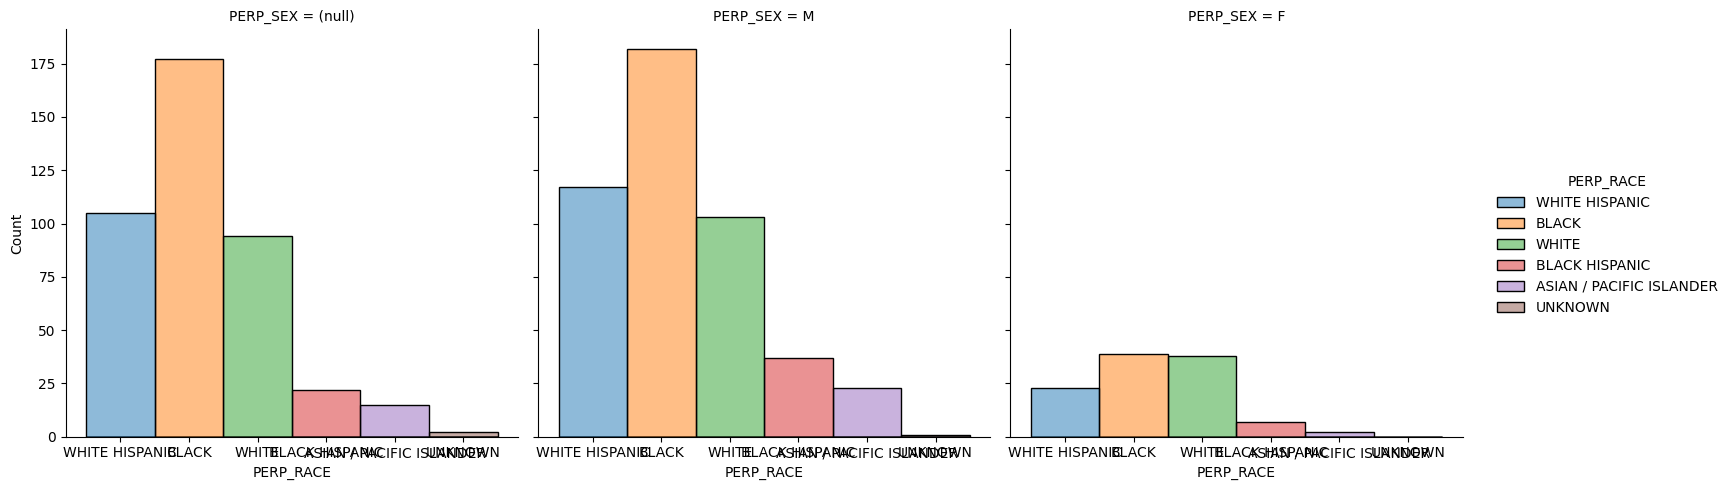

In [31]:
#more visualizing race and sex arrests; borrowed code from classmate - race should be veritical
sns.displot(data=df3, x="PERP_RACE", col="PERP_SEX", hue="PERP_RACE")

In [32]:
#changing arrest precing value from interger to string b/c had weird error that turned out to be a typo of precinct but left change
df3['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].astype("string")

/tmp/ipython-input-2306712706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ARREST_PRECINCT'] = df['ARREST_PRECINCT'].astype("string")


In [33]:
#renamed 94th precinct as greenpoint, wrong df
df.loc[df['ARREST_PRECINCT'] == 94, 'ARREST_PRECINCT'] = 'Greenpoint'

/tmp/ipython-input-4227105001.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Greenpoint' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['ARREST_PRECINCT'] == 94, 'ARREST_PRECINCT'] = 'Greenpoint'


In [34]:
df3.loc[df3['ARREST_PRECINCT'] == 94, 'ARREST_PRECINCT'] = 'Greenpoint'

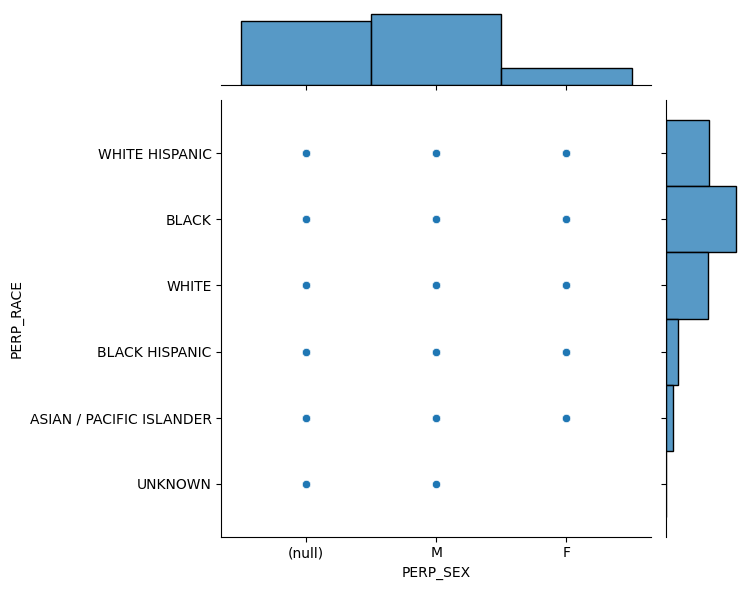

In [35]:
#trying to visualize both race and sex which appear on peripheral bar charts but not internal scatter
sns.jointplot(x='PERP_SEX', y='PERP_RACE', data=df3)

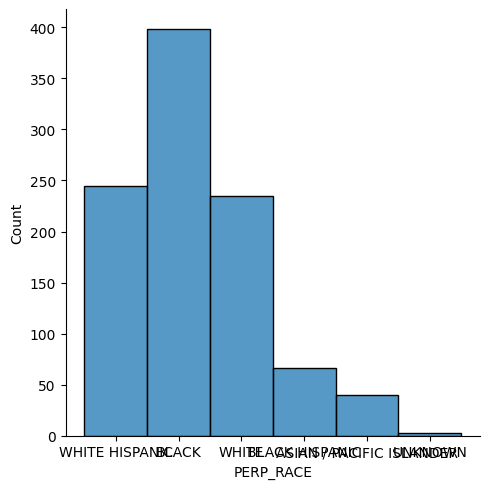

In [36]:
#visualize race arrests as bar - correct number counts
sns.displot(df3['PERP_RACE'])

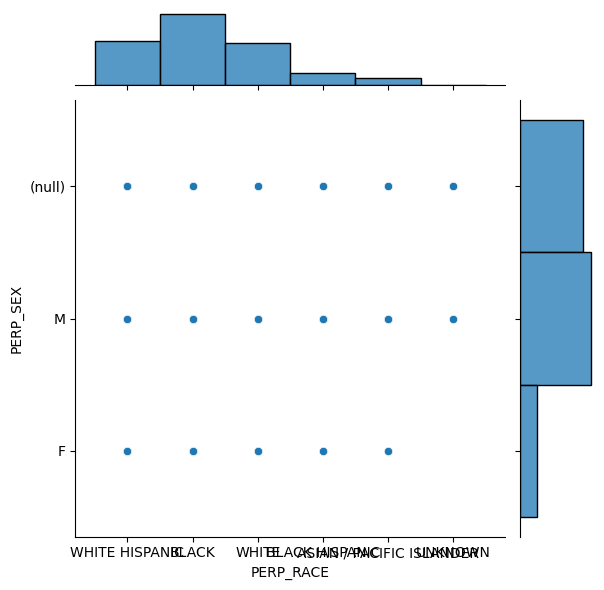

In [37]:
#tried flipping race and sex, scatter still off, bars appear correct
sns.jointplot(x='PERP_RACE', y='PERP_SEX', data=df3)

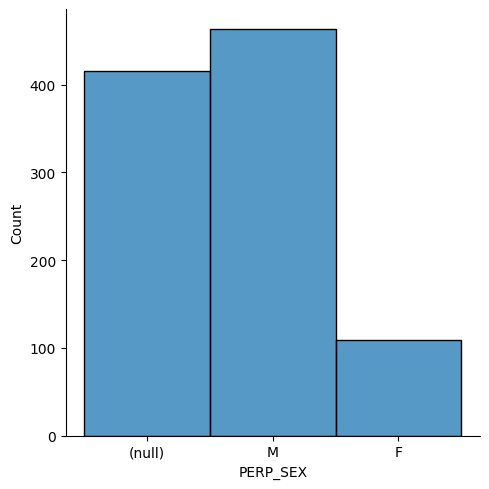

In [38]:
#visualizing arrests by sex, counts are correct
sns.displot(df3['PERP_SEX'])

In [39]:
#groupby confirmation of counts
df3.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

,PERP_SEX
PERP_SEX,
M,463
(null),415
F,109


In [40]:
#groupby confirmation of counts
df3.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

,PERP_RACE
PERP_RACE,
BLACK,398
WHITE HISPANIC,245
WHITE,235
BLACK HISPANIC,66
ASIAN / PACIFIC ISLANDER,40
UNKNOWN,3


<Axes: xlabel='PERP_SEX', ylabel='ARREST_KEY'>

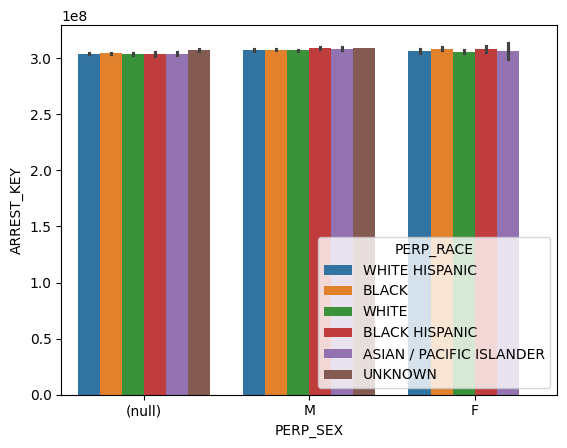

In [41]:
#attempting to visualize both sex and race; hue works to break out race; perp sex axis is fine but unique arrest key which worked for prior counts is now skewed???
sns.barplot(x="PERP_SEX", y="ARREST_KEY", hue="PERP_RACE", data=df3)

<Axes: xlabel='PERP_RACE', ylabel='ARREST_KEY'>

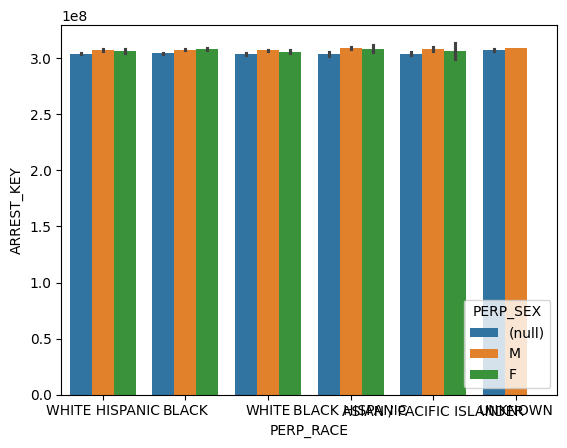

In [42]:
#arrest key still skewed
sns.barplot(x="PERP_RACE", y="ARREST_KEY", hue="PERP_SEX", data=df3)

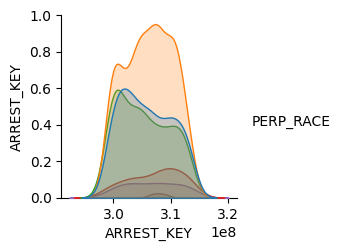

In [43]:
#visualization appears to represent earlier groupby counts but unique arrest key still skewed
sns.pairplot(df3, hue = 'PERP_RACE')

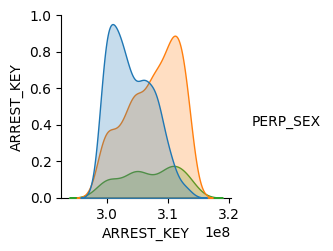

In [44]:
sns.pairplot(df3, hue = 'PERP_SEX')

In [45]:
#look at citywide arrest by sex to compare to greenpoint major differenct
dfsex = df[['PERP_SEX']]

In [46]:
dfsex.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

,PERP_SEX
PERP_SEX,
M,99387
(null),91878
F,21221


In [48]:
# Conclusion :
NYPD's 94th Precinct which represents the North Brooklyn community of Greenpoint has had 987 arrests so far this year, the majority of which have been male *463*
and almost evenly dispersed among black, white hispanic, and white races.  The significant difference in arrest numbers between males and females is almost a seven-fold difference,
which is higher than the City as a whole at a four-fold difference.

SyntaxError: unterminated string literal (detected at line 2) (ipython-input-3250188862.py, line 2)